<a href="https://colab.research.google.com/github/shhd-0/ML/blob/main/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahad164","key":"f61221b92555d23d2671c8af5615da4b"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d charlottebennett1234/lifestyle-factors-and-their-impact-on-students
!unzip lifestyle-factors-and-their-impact-on-students.zip


Dataset URL: https://www.kaggle.com/datasets/charlottebennett1234/lifestyle-factors-and-their-impact-on-students
License(s): DbCL-1.0
Archive:  lifestyle-factors-and-their-impact-on-students.zip
  inflating: student_lifestyle_dataset..csv  


In [5]:
import pandas as pd

# قراءة البيانات
df = pd.read_csv('student_lifestyle_dataset..csv')

# عرض أول 5 صفوف للتأكد من البيانات
print(df.head())


   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5   
2           3                  5.1                            3.9   
3           4                  6.5                            2.1   
4           5                  8.1                            0.6   

   Sleep_Hours_Per_Day  Social_Hours_Per_Day  Physical_Activity_Hours_Per_Day  \
0                  8.7                   2.8                              1.8   
1                  8.0                   4.2                              3.0   
2                  9.2                   1.2                              4.6   
3                  7.2                   1.7                              6.5   
4                  6.5                   2.2                              6.6   

  Stress_Level  Gender  Grades  
0     Moderate    Male    7.48  
1          Low  Female    6.88  

In [7]:
# تحويل Stress_Level إلى أرقام
df['Stress_Level'] = df['Stress_Level'].map({'Low': 0, 'Moderate': 1, 'High': 2})

# تحويل Gender إلى أرقام
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# التحقق من نوع البيانات بعد التحويل
print(df.dtypes)


Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
Stress_Level                         int64
Gender                               int64
Grades                             float64
dtype: object


In [8]:
# تحديد المتغيرات المستقلة (Features) والمتغير التابع (Target)
X = df[['Study_Hours_Per_Day',
        'Extracurricular_Hours_Per_Day',
        'Sleep_Hours_Per_Day',
        'Social_Hours_Per_Day',
        'Physical_Activity_Hours_Per_Day',
        'Stress_Level']]  # يمكن إضافة 'Gender' إذا أردت

y = df['Grades']


In [9]:
from sklearn.model_selection import train_test_split

# تقسيم البيانات إلى تدريب (80%) واختبار (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# تحقق من تقسيم البيانات
print(X_train.shape, X_test.shape)


(1600, 6) (400, 6)


In [10]:
from sklearn.linear_model import LinearRegression

# إنشاء النموذج
model = LinearRegression()

# تدريب النموذج
model.fit(X_train, y_train)


LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

# التنبؤ بالدرجات باستخدام البيانات الاختبارية
y_pred = model.predict(X_test)

# حساب Mean Squared Error و R^2
print("✅ Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("✅ R^2 Score:", r2_score(y_test, y_pred))



✅ Mean Squared Error: 0.2629921214058905
✅ R^2 Score: 0.5495662408120444


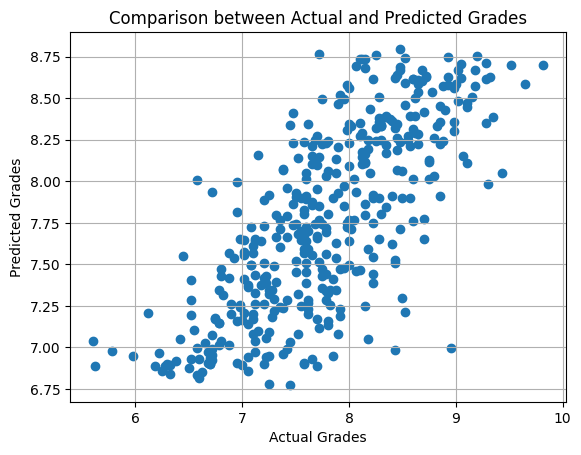

In [12]:
import matplotlib.pyplot as plt

# Plotting the relationship between actual grades and predicted grades
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Comparison between Actual and Predicted Grades")
plt.grid(True)
plt.show()


In [13]:
# طباعة المعاملات الخاصة بكل ميزة
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# ترتيب المعاملات حسب التأثير
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)
print(coefficients)


                           Feature  Coefficient
0              Study_Hours_Per_Day     0.311718
5                     Stress_Level     0.006682
3             Social_Hours_Per_Day    -0.068693
4  Physical_Activity_Hours_Per_Day    -0.069984
2              Sleep_Hours_Per_Day    -0.077641
1    Extracurricular_Hours_Per_Day    -0.095401


In [14]:
import joblib

# حفظ النموذج
joblib.dump(model, 'student_grade_predictor.pkl')


['student_grade_predictor.pkl']

In [15]:
from sklearn.metrics import r2_score

# حساب R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.5495662408120444


In [16]:
from sklearn.metrics import mean_squared_error

# حساب Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 0.2629921214058905


In [17]:
from sklearn.metrics import mean_absolute_error

# حساب Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


Mean Absolute Error (MAE): 0.40978538241278906


In [18]:
# حساب نسبة التنبؤات الصحيحة ضمن حد معين (مثل ± 0.5 درجة)
correct_predictions = abs(y_pred - y_test) <= 0.5
accuracy = correct_predictions.mean() * 100  # النسبة المئوية
print(f"Accuracy (within ±0.5): {accuracy}%")


Accuracy (within ±0.5): 66.25%
